In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/2 - Foundations of Machine Learning/1- Introduction to Machine Learning/homework/Salary Data.csv')

# Data Exploration

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Cleaning

In [12]:
df.rename(columns={'Education Level':'Education_Level' , 'Years of Experience' : 'Years_of_Experience',
                   'Job Title': 'Job_Title'
                   },inplace=True)

## Check duplication

In [14]:
df.duplicated().sum()

50

In [15]:
df.drop_duplicates(inplace=True)

## Outliers detection

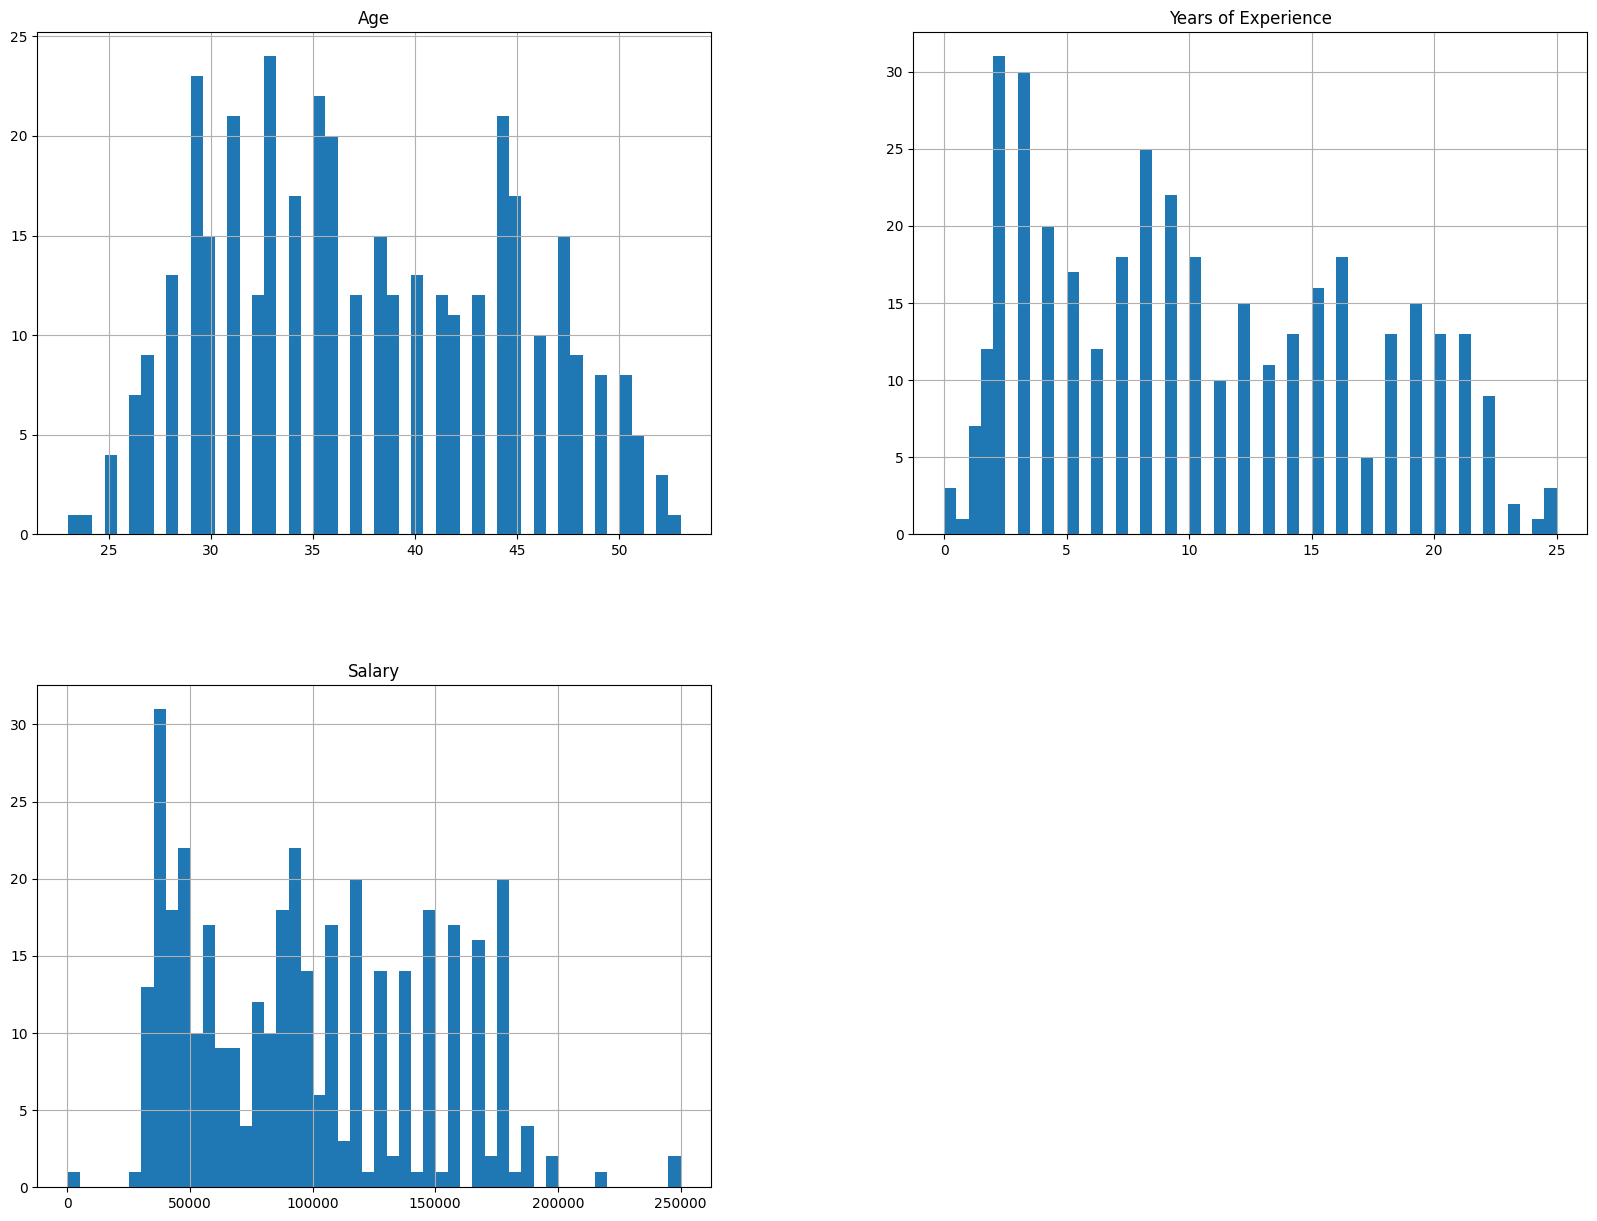

In [6]:
df.hist(bins=50,figsize=(20,15))
plt.show()

### Salary outlier

<Axes: xlabel='Salary'>

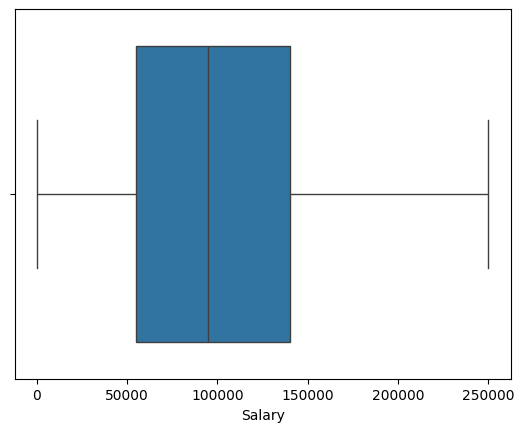

In [13]:
# Salary
sns.boxplot(x=df['Salary'])

In [17]:
# check weather 250000 is normal salary, in the case it is not normal (outliers) we will drop the rows, beacause it is the feature we want to predict

df[df['Salary'] >= 200000]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0


In [18]:
# salary = 350 it is not normal , i will drop the raw
df[df['Salary'] <= 10000]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


In [12]:
df.drop(df[df['Salary'] <= 10000].index, inplace=True)


## Correlation

In [19]:
corr_matrix= df.corr(numeric_only=True)
corr_matrix

,Age,Years_of_Experience,Salary
Age,1.000000,0.979192,0.916543
Years_of_Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

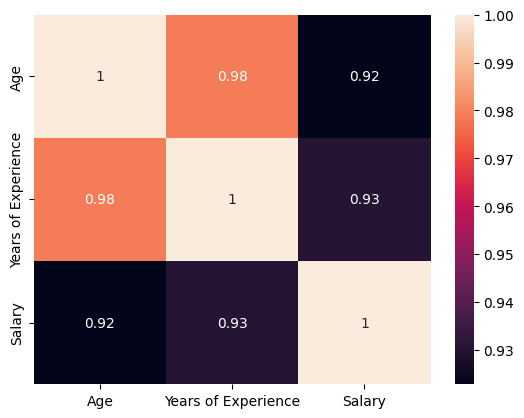

In [16]:
sns.heatmap(corr_matrix, annot=True)

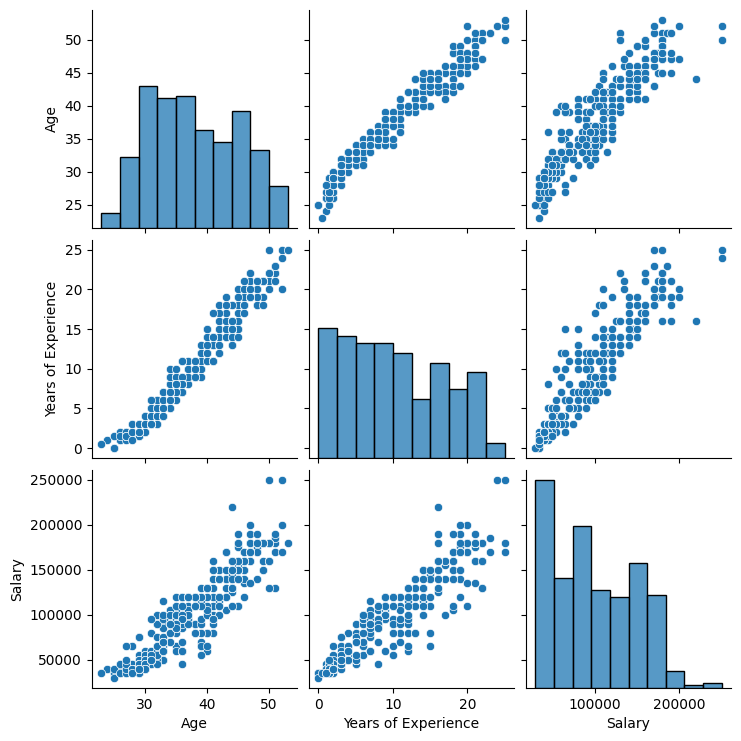

In [17]:
sns.pairplot(df)

## Handling null values

In [20]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [28]:
df.isnull().sum()

Age                    2
Gender                 2
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 2
dtype: int64

In [21]:
# In salary column, i will drop the column that contain null values
df.dropna(subset=["Salary"], inplace=True)

In [22]:
df.isnull().sum()

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64

# Prepare the Data for Machine Learning Algorithms

## Splitting data

In [24]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1) # drop labels for training set
y = df["Salary"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# train_set, test_set = train_test_split(df, test_size=0.2, random_state=6)

## Categorical Data

In [45]:
X_train.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience
346,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
187,34.0,Male,Bachelor's,Senior Quality Assurance Analyst,9.0
27,24.0,Male,Bachelor's,Junior Developer,1.0
293,35.0,Male,Bachelor's,Senior Business Development Manager,7.0
73,28.0,Male,Bachelor's,Technical Support Specialist,2.0


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

X_train['Gender_ecoded'] = encoder.fit_transform(X_train[['Gender']])
X_test['Gender_ecoded'] = encoder.fit_transform(X_test[['Gender']])

# # Convert the encoded columns back to DataFrame and concatenate with the rest of X_train
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['Gender']), index=X_train.index)
# X_train = pd.concat([X_train.drop('Gender', axis=1), X_train_encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Expected a 1D array, got an array with shape (259, 2)

In [30]:
X_train

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Education_Level_encoded,Job_Title_encoded,Age_scalled,Years_of_Experience_scalled
235,32.0,Male,Bachelor's,Junior Sales Representative,3.0,0.0,61,0.300000,0.12
275,38.0,Female,Bachelor's,Senior Project Manager,9.0,0.0,125,0.500000,0.36
51,33.0,Male,Master's,Business Intelligence Analyst,7.0,1.0,5,0.333333,0.28
9,38.0,Male,PhD,Senior Scientist,10.0,2.0,130,0.500000,0.40
112,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,0.0,141,0.900000,0.88
...,...,...,...,...,...,...,...,...,...
205,41.0,Female,PhD,Senior Marketing Director,17.0,2.0,115,0.600000,0.68
268,33.0,Male,Bachelor's,Junior Operations Manager,4.0,0.0,56,0.333333,0.16
72,45.0,Male,PhD,Research Director,16.0,2.0,83,0.733333,0.64
237,45.0,Male,Master's,Senior Software Developer,16.0,1.0,132,0.733333,0.64


In [52]:
X_train['Education_Level'].unique()

array(["Bachelor's", 'PhD', "Master's"], dtype=object)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

X_train['Education_Level_encoded'] = ordinal_encoder.fit_transform(X_train[['Education_Level']])
X_test['Education_Level_encoded'] = ordinal_encoder.fit_transform(X_test[['Education_Level']])


X_train['Gender_ecoded'] = label_encoder.fit_transform(X_train[['Gender']])
X_test['Gender_ecoded'] = label_encoder.fit_transform(X_test[['Gender']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['Job_Title_encoded'] = label_encoder.fit_transform(X_train['Job_Title'])
X_test['Job_Title_encoded'] = label_encoder.fit_transform(X_test['Job_Title'])

## Scalling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train['Age_scalled'] = scaler.fit_transform(X_train[['Age']])
X_test['Age_scalled'] = scaler.fit_transform(X_test[['Age']])



X_train['Years_of_Experience_scalled'] = scaler.fit_transform(X_train[['Years_of_Experience']])
X_test['Years_of_Experience_scalled'] = scaler.fit_transform(X_test[['Years_of_Experience']])

In [34]:
X_train.drop(['Age','Gender','Education_Level','Job_Title', 'Years_of_Experience'],axis=1,inplace=True)
X_test.drop(['Age','Gender','Education_Level','Job_Title', 'Years_of_Experience'],axis=1,inplace=True)

In [33]:
X_train

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Education_Level_encoded,Job_Title_encoded,Age_scalled,Years_of_Experience_scalled,Gender_ecoded
235,32.0,Male,Bachelor's,Junior Sales Representative,3.0,0.0,61,0.300000,0.12,1
275,38.0,Female,Bachelor's,Senior Project Manager,9.0,0.0,125,0.500000,0.36,0
51,33.0,Male,Master's,Business Intelligence Analyst,7.0,1.0,5,0.333333,0.28,1
9,38.0,Male,PhD,Senior Scientist,10.0,2.0,130,0.500000,0.40,1
112,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,0.0,141,0.900000,0.88,0
...,...,...,...,...,...,...,...,...,...,...
205,41.0,Female,PhD,Senior Marketing Director,17.0,2.0,115,0.600000,0.68,0
268,33.0,Male,Bachelor's,Junior Operations Manager,4.0,0.0,56,0.333333,0.16,1
72,45.0,Male,PhD,Research Director,16.0,2.0,83,0.733333,0.64,1
237,45.0,Male,Master's,Senior Software Developer,16.0,1.0,132,0.733333,0.64,1


ML Model

In [44]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [45]:
score = model.score(X_test, y_test)
score

0.9042172667156319

In [46]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
score1 = model1.score(X_test, y_test)
score1

0.1076923076923077

In [40]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
score2 = model2.score(X_test, y_test)
score2

0.7726480037877044

In [51]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [52]:
X_train

,Education_Level_encoded,Job_Title_encoded,Age_scalled,Years_of_Experience_scalled,Gender_ecoded
235,0.0,61,0.300000,0.12,1
275,0.0,125,0.500000,0.36,0
51,1.0,5,0.333333,0.28,1
9,2.0,130,0.500000,0.40,1
112,0.0,141,0.900000,0.88,0
...,...,...,...,...,...
205,2.0,115,0.600000,0.68,0
268,0.0,56,0.333333,0.16,1
72,2.0,83,0.733333,0.64,1
237,1.0,132,0.733333,0.64,1


In [54]:
model2.predict(X_test)

new_data = [['PhD', 'Software Engineer' , 32 ,15, 'Female' ]]

#new_data_processed = pip.transform(new_data)

#model2.predict(new_data_processed)


array([153550., 130800.,  85300., 128900.,  66800.,  75200., 232900.,
        65100., 234300.,  75100.,  49400.,  49200., 103750.,  40600.,
       171100., 121750.,  86250., 146650.,  66650., 232700., 232900.,
        37100.,  39350., 216600., 204450., 124650.,  64650., 168400.,
        40350., 147200.,  71200.,  66150.,  40350.,  84350.,  40900.,
        81550., 172300.,  42050., 122500.,  89300.,  67750.,  36469.,
        65050., 199500.,  40750.,  85800.,  70700.,  49200., 163800.,
       130050.,  49400.,  48900., 129550., 103000., 169950., 200700.,
        60450.,  91500.,  74500.,  69950.,  90050., 239000.,  71550.,
        63700.,  39350.])